['spike_recorder-63805-0.dat', 'spike_recorder-63806-0.dat', 'spike_recorder-63807-0.dat', 'spike_recorder-63808-0.dat', 'spike_recorder-63809-0.dat', 'spike_recorder-63810-0.dat', 'spike_recorder-63811-0.dat', 'spike_recorder-63812-0.dat', 'spike_recorder-63813-0.dat', 'spike_recorder-63814-0.dat', 'spike_recorder-63815-0.dat', 'spike_recorder-63816-0.dat', 'spike_recorder-63817-0.dat', 'spike_recorder-63818-0.dat', 'spike_recorder-63819-0.dat', 'spike_recorder-63820-0.dat', 'spike_recorder-63821-0.dat', 'spike_recorder-63822-0.dat', 'spike_recorder-63823-0.dat', 'spike_recorder-63824-0.dat']
golgi 0 0 0 spike_recorder-63805-0.dat
cell_num 66
golgi 0 1 1 spike_recorder-63806-0.dat
cell_num 65
granule 1 0 2 spike_recorder-63806-0.dat
cell_num 2862
granule 1 1 3 spike_recorder-63807-0.dat
cell_num 2862
purkinje 2 0 4 spike_recorder-63807-0.dat
cell_num 99
purkinje 2 1 5 spike_recorder-63808-0.dat
cell_num 99
basket 3 0 6 spike_recorder-63808-0.dat
cell_num 147
basket 3 1 7 spike_recorde

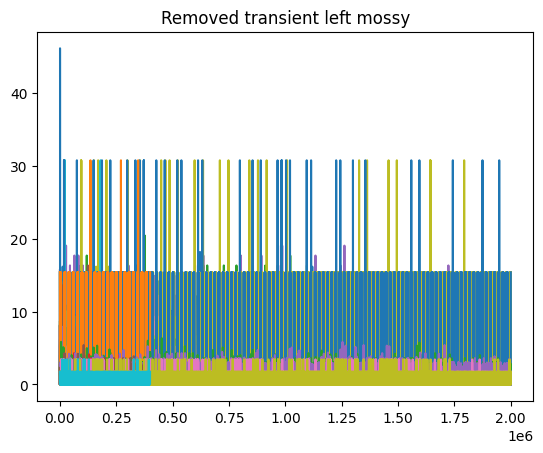

In [1]:
# Import packages
from audioop import avg
import pickle
import numpy as np
import os, glob
import matplotlib.pyplot as plt

from examples.tvb_nest.notebooks.cerebellum.scripts.nest_utils import *
from examples.tvb_nest.notebooks.cerebellum.scripts.scripts import *
from examples.tvb_nest.notebooks.cerebellum.utils import  compute_plot_selected_spectra_coherence, only_plot_selected_spectra_coherence_and_diff


cells = ['golgi', 'granule', 'purkinje', 'basket', 'stellate', 'dcn', 'dcn_gaba', 'io', 'glom', 'mossy']
half = ['right', 'left']


path = 'outputs/100__FIC/res/nest_recordings/'
os.chdir(path)
list_files = glob.glob("*.dat")
avg_frequency = {}
values_frequency = {}
nc = 0
for cell in cells:
    nh = 0
    avg_frequency[cells[nc]] = []
    values_frequency[cells[nc]] = []
    for h in half:
        print(cell, nc,nh,nc*2+nh,list_files[nc*2+nh])
        spikes = np.loadtxt(os.getcwd()+"/"+list_files[nc*2+nh],skiprows=3)
        current_frequency = compute_frequency_signal(spikes, duration=10000, cutoff=0)
        plt.plot(current_frequency)
        plt.title("Full signal "+h+" "+cell)
        plt.show()
        current_frequency = compute_frequency_signal(spikes, duration=10000, cutoff=8000)
        plt.title("Removed transient "+h+" "+cell)
        plt.plot(current_frequency)
        plt.show()
        avg_frequency[cells[nc]].append(np.mean(current_frequency))
        values_frequency[cells[nc]].append(compute_frequency_value(spikes, duration=10000, cutoff=8000))
        
        nh+=1
    nc+=1

print(avg_frequency)
print(values_frequency['mossy'])
